# Exploring Harmonic Oscillators in Extended Ensembles #

In [8]:
from tqdm.notebook import tqdm 
import numpy as np

def nose_hoover_harmonic_oscillator(k, m, Q, T, x_0, v_0, sd_0, t_f, dt):
    '''
    A harmonic oscillator with the nose hoover thermostat.

    Parameters
    ----------
    k : float
        Spring Constant for spring 
    m   : float
        Mass of object in kg
    Q : float
        The fictitious mass
    T : float
        The desired temperature in KbT
    x_0  : float
        Initial position
    v_0 : float
        Initial velocity 
    sd_0 : float
        Initial time derivative of s variable
    t_f : float
        total time
    dt : float
        time interval

    Returns
    -------
    t_values : numpy.ndarray(dtype=float)
        The time values
    v_values: numpy.ndarray(dtype=float)
        The velocity values 
    x_values : numpy.ndarray(dtype=float)
        The position values 
    sd_values : numpy.ndarray(dtype=f
        The sdot values
    kinetic : numpy.ndarray(dtype=float)
        The kinetic energy 
    potential : numpy.ndarray(dtype=float)
        The potential energy
    '''
    t_values = np.arange(0, t_f+dt, dt)
    x_values = np.zeros_like(t_values)
    v_values = np.zeros_like(t_values)
    sd_values = np.zeros_like(t_values)

    x_values[0] = x_0 
    v_values[0] = v_0 
    sd_values[0] = sd_0

    F = lambda x: -k*x
    
    for i, t in enumerate(tqdm(t_values[:-1])):
        # Update position to half timestep
        x = x_values[i] + 0.5*v_values[i]*dt 

        # Update velocity to half timestep
        e = np.exp(-dt*sd_values[i]/2)
        v = e*v_values[i]+ (1-e)/sd_values[i]*F(x)

        # Update sdot
        sd_values[i+1] = sd_values[i] + (dt/Q)*(v**2/m - 2*T)

        # Update velocity to full timestep
        e = np.exp(-dt*sd_values[i+1]/2)
        v_values[i+1] = e*v+(1-e)/sd_values[i+1]*F(x)

        # Update position to full timestep
        x_values[i+1] = x + dt*v_values[i+1]/2

        #Notice the symmetry here ^

    potential = (k*x_values**2)/2
    kinetic = (m*v_values**2)/2

    return t_values, v_values, x_values, sd_values, potential, kinetic

In [9]:
t_values, v_values, x_values, sd_values, potential, kinetic = nose_hoover_harmonic_oscillator(k=1, m=1, Q=1, T=1, x_0=0, v_0=1.55, sd_0=1, t_f=1000, dt=0.001)

  0%|          | 0/1000000 [00:00<?, ?it/s]

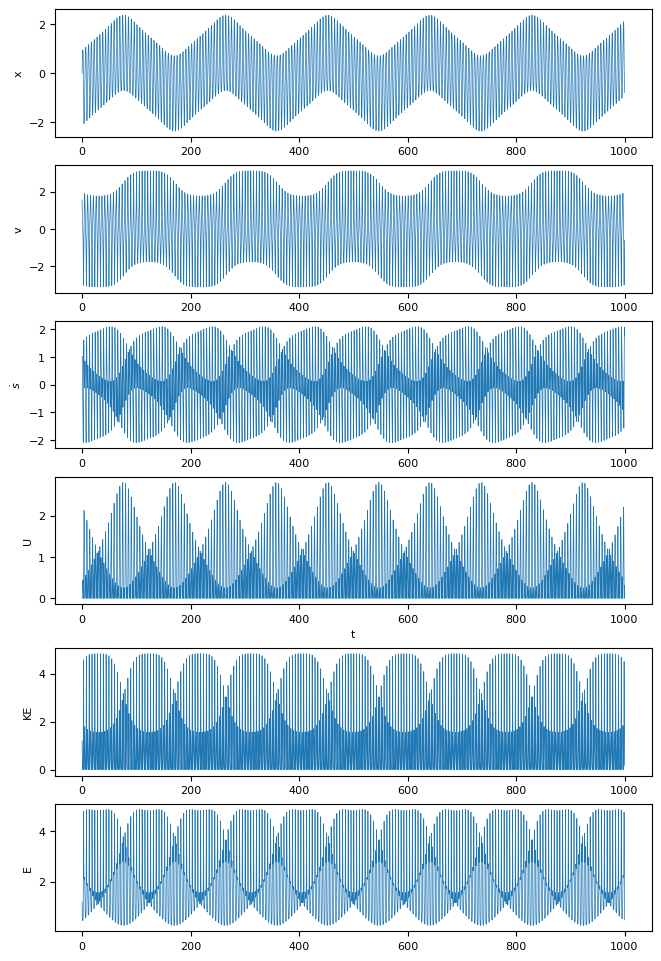

In [10]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 8})

fig, ax = plt.subplots(nrows=6, figsize=(6.5, 9.5), constrained_layout=True)

ax[0].plot(t_values, x_values, label="x", lw=0.5)
ax[1].plot(t_values, v_values, label="v", lw=0.5)
ax[2].plot(t_values, sd_values, label="s", lw=0.5)
ax[3].plot(t_values, potential, label="U", lw=0.5)
ax[4].plot(t_values, kinetic, label="KE", lw=0.5)
ax[5].plot(t_values, potential+kinetic, label="E", lw=0.5)


ax[3].set_xlabel("t")
ax[0].set_ylabel("x")
ax[1].set_ylabel("v")
ax[2].set_ylabel(r"$\dot{s}$")
ax[3].set_ylabel("U")
ax[4].set_ylabel("KE")
ax[5].set_ylabel("E")

plt.show()

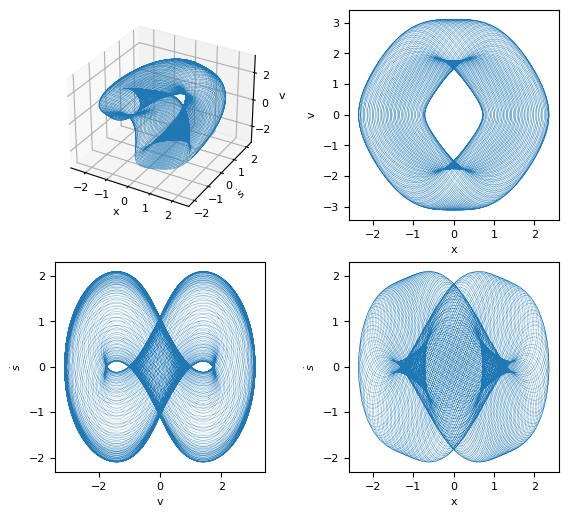

In [11]:
# fig, ax = plt.subplots(nrows=3, figsize=(3, 9), constrained_layout=True)
fig = plt.figure(figsize=(6.5, 6))
ax = [fig.add_subplot(2, 2, 1, projection="3d"),
      fig.add_subplot(2, 2, 2),
      fig.add_subplot(2, 2, 3),
      fig.add_subplot(2, 2, 4),]

ax[0].plot(x_values, sd_values, v_values, lw=0.1)
ax[0].set_xlabel("x", labelpad=-8)
ax[0].set_ylabel(r"$\dot{s}$", labelpad=-8)
ax[0].set_zlabel("v", labelpad=-8)
ax[0].tick_params(pad=-3)

ax[1].plot(x_values, v_values, lw=0.1)
ax[1].set_xlabel("x")
ax[1].set_ylabel("v")

ax[2].plot(v_values, sd_values, lw=0.1)
ax[2].set_xlabel("v")
ax[2].set_ylabel(r"$\dot{s}$")

ax[3].plot(x_values, sd_values, lw=0.1)
ax[3].set_xlabel("x")
ax[3].set_ylabel(r"$\dot{s}$")

plt.subplots_adjust(wspace=0.4)
plt.show()

In [12]:
t_values, v_values, x_values, sd_values, potential, kinetic = {}, {}, {}, {}, {}, {}

for i in np.arange(0.1, 2.1, 0.1):
    t_values[i], v_values[i], x_values[i], sd_values[i], potential[i], kinetic[i] = nose_hoover_harmonic_oscillator(k=1, m=1, Q=1, T=1, x_0=0, v_0=i, sd_0=1, t_f=1000, dt=0.001)

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

In [13]:
def poincare(x_values, v_values, sd_values):
    '''
    Compute the surface of section for when sdot = 0

    Parameters
    ----------
    x_values : numpy.ndarray(dtype=float)
        positions
    v_values : numpy.ndarray(dtype=float)
        velocities
    sd_values : numpy.ndarray(dtype=float)
        s dot values
    
    Returns
    -------
    x_section : numpy.ndarray(dtype=float)
        The values of x on the surface of section
    v_section : numpy.ndarray(dtype=float)
        The values of v on the surface of section
    '''
    def _linear_interpolation(x, x1, x2, y1, y2):
        return y1+((x-x1)*(y2-y1))/(x2-x1)
    
    lx, lv, lsd = x_values[0], v_values[0], sd_values[0]
    v_section, x_section = [], []
    for x, v, sd in zip(x_values[1:], v_values[1:], sd_values[1:]):
        if (sd > 0 and lsd < 0) or (sd < 0 and lsd > 0) or (sd == 0):
            x_section.append(_linear_interpolation(0, lsd, sd, lx, x))
            v_section.append(_linear_interpolation(0, lsd, sd, lv, v))
        lx, lv, lsd = x, v, sd
    
    v_section = np.array(v_section)
    x_section = np.array(x_section)
    return x_section, v_section

x_section, v_section = {}, {}
for i in np.arange(0.1, 2.1, 0.1):
    x_section[i], v_section[i] = poincare(x_values[i], v_values[i], sd_values[i])

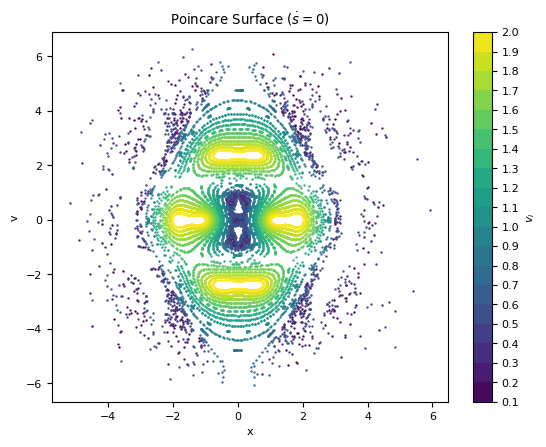

In [14]:
import matplotlib
cmap = matplotlib.colormaps['viridis']
norm = matplotlib.colors.Normalize(vmin=0.1, vmax=2.0)

colors = [cmap(norm(i)) for i in np.arange(0.1,2.1,0.1)]

fig, ax = plt.subplots()
for i, c in zip(np.arange(0.1, 2.1, 0.1), colors):
    ax.scatter(x_section[i], v_section[i], s=0.5, color=c)
ax.set_xlabel("x")
ax.set_ylabel("v")
ax.set_title(r"Poincare Surface ($\dot{s}=0$)")
plt.colorbar(ax=ax, mappable=matplotlib.cm.ScalarMappable(matplotlib.colors.Normalize(0.1, 2.0)), cmap='viridis', boundaries=np.arange(0.1,2.1,0.1), ticks=np.arange(0.1,2.1,0.1), label=r"$v_i$")
plt.show()